In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath
import networkx as nx

from metal.label_model import LabelModel
from metal.label_model.graph_utils import JunctionTree
from synthetic.generate_spa import (
    ChainDependencies,
    TreeDependencies,
    ClusterDependencies,
    DataGenerator
)
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create the dependencies structure as a `DependenciesGraph`

In [2]:
np.random.seed(123)

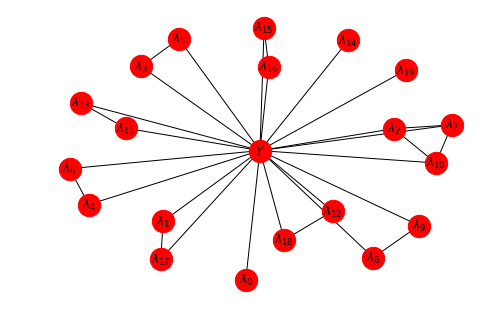

In [3]:
M = 20
N_CLUSTERS = 15
EDGE_PROB = 1.0
deps_graph = ClusterDependencies(M, N_CLUSTERS, edge_prob=EDGE_PROB)
# deps_graph = ChainDependencies(M)
deps_graph.draw()

## Creat the `DataGenerator` and label matrix $L$

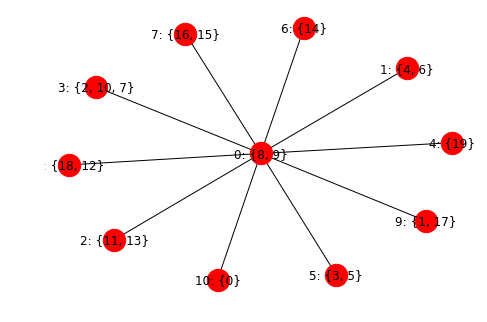

In [4]:
N = 10000
K = 2
HIGHER_ORDER_CLIQUES = True

data = DataGenerator(
    N,
    M,
    k=K,
    abstains=False,
    deps_graph=deps_graph,
    higher_order_cliques=HIGHER_ORDER_CLIQUES
)
data.jt.draw()

In [5]:
%time L, Y = data.generate_label_matrix(N)

CPU times: user 6.51 s, sys: 127 ms, total: 6.63 s
Wall time: 6.54 s


### Train `LabelModel`

In [6]:
class_balance = data.get_class_balance()
class_balance

array([0.65116386, 0.34883614])

In [7]:
lm = LabelModel(k=2)

lm.train(
    L_train=L,
    class_balance=class_balance,
    junction_tree=data.jt,
    lr=0.001,
    n_epochs=5000,
    print_every=500
)

mu = data.get_mu()
np.mean(np.abs(lm.mu - mu))

Estimating Z...
[E:0]	Train Loss: 953.62561035
[E:500]	Train Loss: 17.49965286
[E:1000]	Train Loss: 17.49965286
[E:1500]	Train Loss: 17.49965286
[E:2000]	Train Loss: 17.49965286
[E:2500]	Train Loss: 17.49965286
[E:3000]	Train Loss: 17.49965286
[E:3500]	Train Loss: 17.49965286
[E:4000]	Train Loss: 17.49965286
[E:4500]	Train Loss: 17.49965286
[E:4999]	Train Loss: 17.49965286
Finished Training


0.0031010078224238914

In [8]:
lm.score(X=L, Y=Y)

Accuracy: 0.965


0.9645